# Eclat

The **Eclat model** is a method used in association rule learning, particularly for market basket analysis and recommendation systems.

The Eclat model is a streamlined approach to association rule learning that emphasizes the frequency of itemsets in transactions, providing valuable insights for recommendations and marketing strategies.

### Overview of the Eclat Model

**Intuition and Purpose**:
- The Eclat model focuses on identifying itemsets that frequently occur together in transactions, much like a recommender system.
   - For example, it can help discover that people who buy certain movies are likely to buy others as well.

**Difference from A Priori**:
- Unlike the A Priori model, which generates rules based on metrics like support, confidence, and lift, the Eclat model only concentrates on **support**.
- It aims to find sets of items (or products) that co-occur in transactions without explicitly calculating the strength of associations using confidence or lift.

**Support Metric**:
- In the Eclat model, support measures **how frequently a specific set of items appears together in the dataset**.
- For instance, if you want to know how often two movies, like **Interstellar** and **Ex Machina**, are watched together, you would calculate their support as the percentage of lists containing both movies.



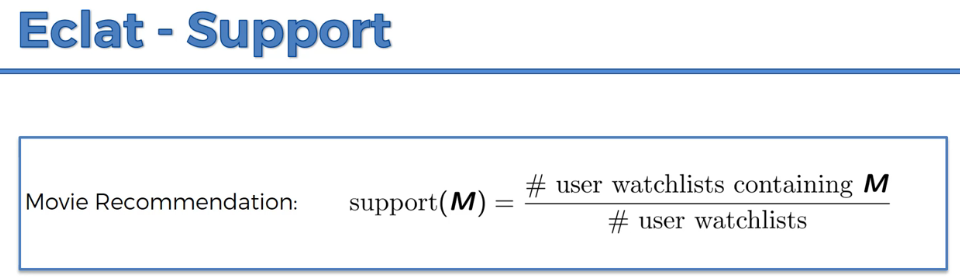


**Itemsets**:
- The model looks at combinations of items, requiring at least two items in a set.
- This allows it to identify patterns in consumer behavior, such as the likelihood of purchasing certain products together (e.g., burgers and fries).

**Implementation Steps**:
1. The process involves setting a minimum support threshold to filter out infrequent itemsets.
2. It then identifies all subsets of items that exceed this support level and sorts them based on their support values.
3. The strongest combinations (those with the highest support) are prioritized for analysis.

**Efficiency**:
- The Eclat model is noted for its efficiency and simplicity, making it easier to understand and implement than the A Priori model.

## Importing the libraries

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=2f8f2f2a2158bf3f9f8cf789e17d962b458722278aaba3bcb66f36385b3fffed
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset from a CSV file in Google Drive, without headers
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 5 - Association Rule Learning/2 Eclat/Market_Basket_Optimisation.csv', header = None)

# Initializing an empty list to store transactions
transactions = []

# Looping through each transaction (row) in the dataset (7501 transactions in total)
for i in range(0, 7501):
  # For each transaction, creating a list of items in the transaction (20 items per row) and converting them to strings
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

## Training the Eclat model on the dataset

In [10]:
# Import the apriori algorithm from the apyori package
from apyori import apriori

# Applying the apriori algorithm on the transactions dataset
# transactions: the list of all transactions from the dataset
# min_support: the minimum support threshold (0.003 means the product is bought at least 0.3% of the time)
# min_confidence: the minimum confidence threshold (0.2 means rules should have at least 20% confidence)
# min_lift: the minimum lift threshold (3 means the association should increase the likelihood by at least 3 times)
# min_length: the minimum number of items in the rule (2 means the rule should consist of at least two items)
# max_length: the maximum number of items in the rule (2 means the rule can have at most two items)
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

To train Eclat model on a dataset, they suggest keeping the `apriori` method by keeping the minimum confidence and lift settings to ensure stronger associations between products.

Eclat focuses on sets of products rather than rules, only considering the support.

Explanation for the parameters:

**min_support**
   - **Calculation**: We want to consider products that appear in at least 3 transactions per day. Since the data spans **7 days**, this amounts to **21 transactions per week**.
   - **Support Definition**: Support is the frequency of a product pair occurring in the transactions. To compute the minimum support, we divide the number of transactions where a product pair appears by the total number of transactions (7501).
   - **Formula**: $\text{min_support} = \frac{21}{7501} = 0.0027 \approx 0.003$
   - **Explanation**: This means that the rule will only be considered if the product pair appears in at least **0.3%** of the transactions.

**min_confidence**
   - **Calculation**: The confidence threshold was chosen experimentally. Initially, a high value of **0.8** was used, but it resulted in no rules. After trial and error, a value of **0.2** was found to yield a good number of relevant rules.
   - **Explanation**: The **confidence** of a rule is the percentage of transactions where the rule holds true. A confidence of **0.2** (20%) means the rule needs to be correct at least 20% of the time.

**min_lift**
   - **Calculation**: Based on experience and rule-of-thumb, a **lift** value of **3** was chosen. This indicates that the occurrence of the right-hand-side product (B) is at least 3 times more likely when the left-hand-side product (A) is present.
   - **Explanation**: Lift measures the relevance of the rule. A **lift** of **3** ensures that the product pair has significant associative strength.

**min_length** and **max_length**
   - **min_length = 2** and **max_length = 2**
   - **Explanation**: In the context of the problem, the goal is to find rules involving exactly **two products**: one on the left-hand side (product A) and one on the right-hand side (product B). Setting both the minimum and maximum length to **2** ensures that the rules generated will only include two products.


## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [11]:
# Convert the generated rules from the Apriori algorithm into a list for easier viewing and manipulation
results = list(rules)

In [12]:
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Putting the results well organised into a Pandas DataFrame

Adjustments made for the Eclat model: which does not use confidence or lift as in Apriori.
- Removed references to confidence and lift from the code, including from the inspect function and the final data frame.
- Additionally, the terms "left-hand side" and "right-hand side" were replaced by "product one" and "product two" since Eclat only deals with sets of products, not rules.

The focus is solely on product sets, not associations between products.

In [13]:
def inspect(results):

    # Extract the Left Hand Side (LHS) of the rule, which is the first item in the ordered statistic
    lhs         = [tuple(result[2][0][0])[0] for result in results]

    # Extract the Right Hand Side (RHS) of the rule, which is the second item in the ordered statistic
    rhs         = [tuple(result[2][0][1])[0] for result in results]

    # Extract the support for each rule (the second element in each result)
    supports    = [result[1] for result in results]

    # Return a list of tuples with LHS, RHS and support for each rule
    return list(zip(lhs, rhs, supports))

# Convert the inspected results into a DataFrame for better readability
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Product 1', 'Product 2', 'Support'])

### Displaying the results sorted by descending supports

In [15]:
# Retrieve the top 10 rules with the highest Support value from the DataFrame
resultsinDataFrame.nlargest(n = 10, columns = 'Support')

,Product 1,Product 2,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200


This is how the Eclat model is adapted from the Apriori model to focus on finding sets of products with the highest support.

To analyze larger sets of products, the parameters can be adjusted, such as increasing the maximum set length. Although the output might resemble a rule with products on the left and right sides, the support remains the same for the entire product set. The emphasis is on the support of the set rather than specific association rules.

**Recommendation**: the instructor still recommends to work with the Apriori Model because these extra metrics such as the confidence and the lift will give you much stronger results in the end.